In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 

In [33]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNEL = 3
EPOCHS = 50

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
           "PlantVillage", 
    shuffle = True, 
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [8]:
class_names = dataset.class_names

In [9]:
class_names


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
len(dataset)

68

In [12]:
for image_batch, label_batch in dataset.take(1):
    print (image_batch.shape)
    print (label_batch.numpy())
    
    #the numbers in the array indicate that we have three diffrent types of images [0,1,2]


(32, 256, 256, 3)
[1 1 0 0 1 0 2 1 0 1 0 0 1 0 2 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1]


In [14]:
#To print the first element [0]

for image_batch, label_batch in dataset.take(1):
    print (image_batch[0])

tf.Tensor(
[[[149. 143. 145.]
  [150. 144. 146.]
  [147. 141. 143.]
  ...
  [201. 195. 197.]
  [193. 187. 189.]
  [179. 173. 175.]]

 [[148. 142. 144.]
  [152. 146. 148.]
  [143. 137. 139.]
  ...
  [196. 190. 192.]
  [193. 187. 189.]
  [184. 178. 180.]]

 [[150. 144. 146.]
  [160. 154. 156.]
  [146. 140. 142.]
  ...
  [189. 183. 185.]
  [192. 186. 188.]
  [190. 184. 186.]]

 ...

 [[165. 160. 167.]
  [140. 135. 142.]
  [148. 143. 150.]
  ...
  [182. 179. 186.]
  [181. 178. 185.]
  [180. 177. 184.]]

 [[155. 150. 157.]
  [125. 120. 127.]
  [155. 150. 157.]
  ...
  [179. 176. 183.]
  [179. 176. 183.]
  [179. 176. 183.]]

 [[154. 149. 156.]
  [148. 143. 150.]
  [140. 135. 142.]
  ...
  [181. 178. 185.]
  [183. 180. 187.]
  [183. 180. 187.]]], shape=(256, 256, 3), dtype=float32)


In [16]:
#It is tensor, so we have to change into two dimensional array, we use the function numpy()

for image_batch, label_batch in dataset.take(1):
    print (image_batch[0].numpy())

[[[ 61.  61.  73.]
  [ 61.  61.  73.]
  [ 64.  62.  75.]
  ...
  [151. 132. 138.]
  [150. 131. 137.]
  [149. 130. 136.]]

 [[ 70.  70.  82.]
  [ 69.  69.  81.]
  [ 69.  67.  80.]
  ...
  [144. 125. 131.]
  [145. 126. 132.]
  [146. 127. 133.]]

 [[ 66.  64.  77.]
  [ 65.  63.  76.]
  [ 64.  62.  75.]
  ...
  [146. 127. 133.]
  [149. 130. 136.]
  [152. 133. 139.]]

 ...

 [[196. 184. 184.]
  [181. 169. 169.]
  [186. 174. 174.]
  ...
  [160. 148. 148.]
  [163. 151. 151.]
  [166. 154. 154.]]

 [[165. 153. 153.]
  [161. 149. 149.]
  [173. 161. 161.]
  ...
  [160. 148. 148.]
  [161. 149. 149.]
  [161. 149. 149.]]

 [[160. 148. 148.]
  [162. 150. 150.]
  [170. 158. 158.]
  ...
  [166. 154. 154.]
  [167. 155. 155.]
  [167. 155. 155.]]]


In [17]:
#shape of the first image 

for image_batch, label_batch in dataset.take(1):
    print (image_batch[0].shape)

(256, 256, 3)


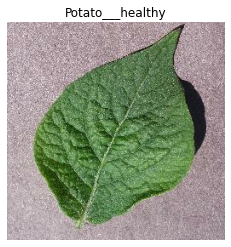

In [26]:
for image_batch, label_batch in dataset.take(1):
    
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title (class_names[label_batch[0]])
    plt.axis("off")
   

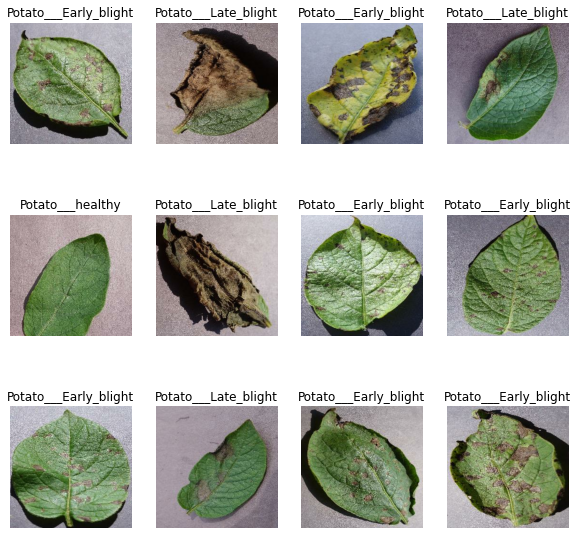

In [31]:

plt.figure (figsize = (10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12): 
        ax = plt.subplot (3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title (class_names[label_batch[i]])
        plt.axis("off")

In [32]:
len (dataset)

68

     80% ==> training 

     20% ==> 10% ===> validation 

             10% ===> test

In [34]:
train_size = 0.8
len (dataset) * train_size 

54.400000000000006

In [35]:
train_ds = dataset.take(54)
len (train_ds)

54

In [43]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [44]:
val_size = 0.1
len (dataset) * val_size

6.800000000000001

In [45]:
val_ds = test_ds.take(6)
len (val_ds)

6

In [46]:
test_ds = test_ds.skip(6) 
len (test_ds)

8

In [47]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    
    ds_size = len (ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
   
    train_size = int (train_split * ds_size)
    val_size = int (val_split * ds_size)
    
    train_ds = ds.take (train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    

    return train_ds, val_ds, test_ds


In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf (dataset)

In [49]:
len(train_ds)

54

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
#resizing images that are out of range size 

resize_and_rescale = tf.keras.Sequentail ([
    layers.experimental_preprocessing_Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental_preprocessing_Rescaling (1.0/255)
])
                                          

In [ ]:
data_augmentation = tf.keras.Sequentail ([
    layers.experimental_preprocessing_RandomFlip("horiontal_and_vertical"),
    layers.experimental_preprocessing_RandomRotation (0.2)
])
                               